计算pi电子的时候，需要只计算原子的价层电子，但是如何区分出价层电子呢？

能否根据高斯指数和原子半径之间的关系来判断吗？

In [33]:
import sys;sys.path.append('d:/code/pywfn')

In [35]:
from pathlib import Path
import json
import matplotlib.pyplot as plt
import numpy as np
PI=np.pi
FACS = [1., 1., 3., 15., 105., 945.]
from pywfn.data.elements import elements

In [23]:
basis_datas=json.loads(Path("../bses/def2-SVP.json").read_text())
def elem_data(elem:int):
    shls=basis_datas['elements'][f'{elem}']['electron_shells']
    shls_data=[]
    for shel in shls:
        angs=shel['angular_momentum']
        alps=[float(e) for e in shel['exponents']]
        coes=[[float(e) for e in l] for l in shel['coefficients']]
        shls_data.append([angs,alps,coes])
    return shls_data

def gtf(r:float,ang:int,alp:float):
    fac=FACS[ang]
    nm = (2.0 * alp / PI)**(0.75) * ((4.0 * alp)**(ang) / fac)**0.5
    return nm*r**ang*np.exp(-alp * r**2)

# 一个壳层的数据
def cgf(r:float,angs:list[int],alps:list[float],coes:list[list[float]]):
    val=0.0
    for i,ang in enumerate(angs):
        for alp,coe in zip(alps,coes[i]):
            val+=coe*gtf(r,ang,alp)
    return val

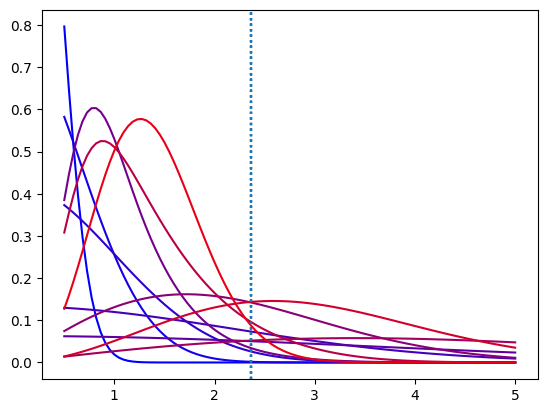

In [41]:
data=elem_data(44)
xs:list[float]=np.linspace(0.5,5,100).tolist() # type: ignore
cb=np.array([0,0,1.])
cr=np.array([1.,0,0])
for i,(angs,alps,coes) in enumerate(data):
    ratio=i/len(data)
    color=(1-ratio)*cb+ratio*cr
    vals=[cgf(x,angs,alps,coes) for x in xs]
    plt.plot(xs,vals,color=color)
    rad=elements[44].rad
    plt.axvline(x=rad,linestyle=':')